In [29]:
!conda install -c conda-forge geopy --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [30]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         868 KB

The following NEW packages will be INSTALLED:

    altair:  3.2.0-py36_0 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge


vincent-0.4.4        | 28 KB     | #################################

# Introduction

Toronto is one of the most improtant cities in Canada. This is true in terms of economy, population density and tourism. This popularity has resulted in the establishments of multiple restaurants and hotels. 

Hotels generally charge their customers insane amounts of money for laundry. This inconveniences and discourages customers from wanting to use hotel laundry services. People then prefer to look around the area to find laundromats and pay a lot less for laundry services.

Hence, this project aims to find the best laundromats nearest to hotels and farther away from other laundromats.

# Data

The data necessary to answer the problem statement includes the locations and the types of venues around the Toronto city area.

First, the locations of all existing laundromats or laundry services in the Toronto city region will be extracted to survey the competition. Ideally, the new laundromat would be set up at a certain distance away from other existing laundromats. Secondly, the locations of travel accommodations such as hotels, hostels and motels in the region will be obtained. This is to estimate the amount of visitors that would frequent the laundromat, based on the assumption that the clientele of the laundromat would be mainly made up of travellers.

A suitable location for the new laundromat would be at the centre of a cluster of hotels and hostels so as to maximise the business potential. A clustering algorithm would be performed on the locations of laundromats and hotels separately to find the concentration of both types of the establishments.

Finally, the ideal location for setting up a new laundromat can be inferred based on the clustering result.

In [58]:
#using beautifulsoup to extract table data from given webpage
import urllib.request as ur
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import folium

In [59]:
wiki="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M" #link to wikipedia page
page=ur.urlopen(wiki)
soup=bs(page)

In [60]:
table=soup.find_all('table', class_='wikitable sortable')#finding the right table

In [61]:
'''
first, we find all the rows of the table and store them in separate indices of a list. we then format it correctly by removing whitespaces, newline
characters etc and convert the dataframe to a list so that conducting operations are easy. rows where borough is not assigned are removed from the
dataframe
'''
rows=[]
for row in table[0].find_all('tr'):
    rows.append(row.text.strip())
for i in range(len(rows)):
    rows[i]=rows[i].split('\n')
df=pd.DataFrame(rows)
df.columns=df.iloc[0]
df=df.drop(df.index[0])
df=df[df.Borough != 'Not assigned']
df.columns=['PostalCode', 'Borough', 'Neighborhood']
lst=df.values.tolist()
len(lst)

211

In [66]:
'''
we check to see of the postal codes match. in that case we join the neighborhood names and delete the redundant row
'''
for i in range(1, len(lst)):
    if(lst[i][0]==lst[i-1][0]):
        lst[i][2]=lst[i][2]+','+lst[i-1][2]
        del lst[i-1]

IndexError: list index out of range

In [67]:
len(lst)

103

In [68]:
'''
we check to see if a neighborhood is not assigned. if not, then the neighborhood name becomes the same as the borough name
'''
for i in range(len(lst)):
    if lst[i][2]=='Not assigned':
        lst[i][2]=lst[i][1]

In [71]:
df=pd.DataFrame(lst)
df.columns=['PostalCode', 'Borough', 'Neighborhood']
df_new=df.sort_values(by='PostalCode')
df_new.reset_index(drop=True, inplace=True)
df_new

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern,Rouge"
1,M1C,Scarborough,"Port Union,Rouge Hill,Highland Creek"
2,M1E,Scarborough,"West Hill,Morningside,Guildwood"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park,Ionview,East Birchmount Park"
7,M1L,Scarborough,"Oakridge,Golden Mile,Clairlea"
8,M1M,Scarborough,"Scarborough Village West,Cliffside,Cliffcrest"
9,M1N,Scarborough,"Cliffside West,Birch Cliff"


In [72]:
df_new.shape

(103, 3)

In [73]:
!wget -q -O 'toronto_data.csv' https://cocl.us/Geospatial_data

In [74]:
with open('toronto_data.csv') as csv_data:
    toronto_data = pd.read_csv(csv_data)

In [75]:
toronto_data.columns=['PostalCode', 'Latitude', 'Longitude']
toronto_data

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [76]:
df_newll=pd.merge(df_new, toronto_data, on='PostalCode', how='left')
df_newll

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern,Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Port Union,Rouge Hill,Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"West Hill,Morningside,Guildwood",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park,Ionview,East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Oakridge,Golden Mile,Clairlea",43.711112,-79.284577
8,M1M,Scarborough,"Scarborough Village West,Cliffside,Cliffcrest",43.716316,-79.239476
9,M1N,Scarborough,"Cliffside West,Birch Cliff",43.692657,-79.264848


In [77]:
'''
let us search for laundromats in scarborough
'''
scarb = df_newll[df_newll['Borough']=='Scarborough'].reset_index(drop=True)
scarb

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern,Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Port Union,Rouge Hill,Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"West Hill,Morningside,Guildwood",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park,Ionview,East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Oakridge,Golden Mile,Clairlea",43.711112,-79.284577
8,M1M,Scarborough,"Scarborough Village West,Cliffside,Cliffcrest",43.716316,-79.239476
9,M1N,Scarborough,"Cliffside West,Birch Cliff",43.692657,-79.264848


In [78]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [79]:
CLIENT_ID = '5V4OGHL3GTPSGUJIYL5NG4TGI4TBMDBTSH0CXB3MPPXMBSUQ' 
CLIENT_SECRET = 'C24OAYMBZP02JDXEGPPM5OE0Z0TC515EXPDT41CZRNEZTIU3' 
VERSION = '20181111'

In [87]:
def getLaundry(names, latitudes, longitudes, radius=500):
    
    vlist=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng,'Laundromat Laundry',
                                                                                                                                            radius, 100)
        results = requests.get(url).json()["response"]['venues']        
        vlist.append([(name, lat, lng, v['name'], v['location']['lat'], v['location']['lng'], v['categories'][0]['name']) for v in results if v['categories']])

    nearby_venues = pd.DataFrame([item for vlist in vlist for item in vlist])
    nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    return(nearby_venues)

In [88]:
laundro_venues = getLaundry(scarb['Neighborhood'],scarb["Latitude"],scarb['Longitude'],2000)
laundro_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern,Rouge",43.806686,-79.194353,Laundry Area,43.811530,-79.171103,Laundry Service
1,"Malvern,Rouge",43.806686,-79.194353,Laundry room,43.798004,-79.166901,Laundry Service
2,"Port Union,Rouge Hill,Highland Creek",43.784535,-79.160497,Laundry room,43.798004,-79.166901,Laundry Service
3,"West Hill,Morningside,Guildwood",43.763573,-79.188711,Morningside Laundry,43.765144,-79.184260,Laundry Service
4,"West Hill,Morningside,Guildwood",43.763573,-79.188711,Best Coin Laundry,43.768620,-79.185315,Laundromat


In [91]:
def getHotels(names, latitudes, longitudes, radius=500):
    
    vlist=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng,'Hostel Hotel',radius, 
                                                                                                                                            100)

        results = requests.get(url).json()["response"]['venues']
        vlist.append([(name, lat, lng, v['name'], v['location']['lat'], v['location']['lng'], v['categories'][0]['name']) for v in results if v['categories']])

    nearby_venues = pd.DataFrame([item for vlist in vlist for item in vlist])
    nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)

In [92]:
hotel_venues = getHotels(scarb['Neighborhood'],scarb["Latitude"],scarb['Longitude'],2000)
hotel_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Oakridge,Golden Mile,Clairlea",43.711112,-79.284577,Holiday Inn Don Valley Hotel Toronto,43.719264,-79.310600,Hotel
1,"Wexford Heights,Scarborough Town Centre,Dorset...",43.757410,-79.273304,Delta Hotels by Marriott Toronto East,43.777070,-79.282822,Hotel
2,"Tam O'Shanter,Sullivan,Clarks Corners",43.781638,-79.304302,Radisson Hotel Toronto East,43.769292,-79.322182,Hotel
3,"Tam O'Shanter,Sullivan,Clarks Corners",43.781638,-79.304302,Delta Hotels by Marriott Toronto East,43.777070,-79.282822,Hotel
4,"Tam O'Shanter,Sullivan,Clarks Corners",43.781638,-79.304302,Fitness Centre,43.769260,-79.322436,Gym


In [95]:
scarb_latitude = 43.777702
scarb_longitude = -79.233238
map_clusters = folium.Map(location=[scarb_latitude, scarb_longitude], zoom_start=12)
markers_colors = []
for lat, lon, poi in zip(laundro_venues['Venue Latitude'], laundro_venues['Venue Longitude'], laundro_venues['Venue']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker([lat, lon],radius=5,popup=label,color='blue',fill=True,fill_color='blue',fill_opacity=0.7).add_to(map_clusters)
    
for lat, lon, poi in zip(hotel_venues['Venue Latitude'], hotel_venues['Venue Longitude'], hotel_venues['Venue']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker([lat, lon],radius=5,popup=label,color='red',fill=True,fill_color='red',fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [96]:
laundro_feature = laundro_venues[['Venue Latitude','Venue Longitude']]
hotel_feature = hotel_venues[['Venue Latitude','Venue Longitude']]

In [97]:
from sklearn.preprocessing import MinMaxScaler
laundro_data = laundro_feature.values #returns a numpy array
hotel_data = hotel_feature.values
min_max_scaler = MinMaxScaler()
laundro_mtx = min_max_scaler.fit_transform(laundro_data)
hotel_mtx = min_max_scaler.fit_transform(hotel_data)
laundro_mtx [0:5]

array([[0.98124845, 0.97370442],
       [0.87323197, 1.        ],
       [0.87323197, 1.        ],
       [0.61079978, 0.89134847],
       [0.63856498, 0.8847506 ]])

In [98]:
import scipy
laundro_leng = laundro_mtx.shape[0]
laundro_D = scipy.zeros([laundro_leng,laundro_leng])
for i in range(laundro_leng):
    for j in range(laundro_leng):
        laundro_D[i,j] = scipy.spatial.distance.euclidean(laundro_mtx[i], laundro_mtx[j])
        
print(laundro_D)

[[0.         0.11117111 0.11117111 ... 0.55549474 0.9819663  0.98159151]
 [0.11117111 0.         0.         ... 0.59513179 0.99833981 1.00013068]
 [0.11117111 0.         0.         ... 0.59513179 0.99833981 1.00013068]
 ...
 [0.55549474 0.59513179 0.59513179 ... 0.         0.44677342 0.44226093]
 [0.9819663  0.99833981 0.99833981 ... 0.44677342 0.         0.01955006]
 [0.98159151 1.00013068 1.00013068 ... 0.44226093 0.01955006 0.        ]]


In [99]:
# Import libraries
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
import pylab
import scipy.cluster.hierarchy
from scipy.cluster.hierarchy import fcluster

# Perform clustering
laundro_Z = hierarchy.linkage(laundro_D, 'complete')
max_d = 3
laundro_clusters = fcluster(laundro_Z, max_d, criterion='distance')
laundro_dend = hierarchy.dendrogram(laundro_Z)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


In [100]:
hotel_leng = hotel_mtx.shape[0]
hotel_D = scipy.zeros([hotel_leng,hotel_leng])
for i in range(hotel_leng):
    for j in range(hotel_leng):
        hotel_D[i,j] = scipy.spatial.distance.euclidean(hotel_mtx[i], hotel_mtx[j])
        
print(hotel_D)

[[0.         1.1153489  0.85734866 1.1153489  0.85837257 0.857051
  1.08275998]
 [1.1153489  0.         0.83845859 0.         0.84381745 0.8430152
  1.00126289]
 [0.85734866 0.83845859 0.         0.83845859 0.0053665  0.00465079
  0.24710404]
 [1.1153489  0.         0.83845859 0.         0.84381745 0.8430152
  1.00126289]
 [0.85837257 0.84381745 0.0053665  0.84381745 0.         0.00146104
  0.24382199]
 [0.857051   0.8430152  0.00465079 0.8430152  0.00146104 0.
  0.24528289]
 [1.08275998 1.00126289 0.24710404 1.00126289 0.24382199 0.24528289
  0.        ]]


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  from ipykernel import kernelapp as app


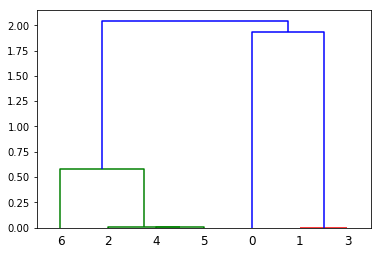

In [101]:
# Perform clustering
hotel_Z = hierarchy.linkage(hotel_D, 'complete')
max_d = 3
hotel_clusters = fcluster(hotel_Z, max_d, criterion='distance')
hotel_dend = hierarchy.dendrogram(hotel_Z)

In [102]:
laundro_venues['cluster_'] = laundro_clusters
hotel_venues['cluster_'] = hotel_clusters

In [109]:
# Assuming Toronto coordinates as 43.653170, -79.383541
scarb_latitude = 43.777702
scarb_longitude = -79.233238

# create map
map_clusters = folium.Map(location=[scarb_latitude, scarb_longitude], zoom_start=12)

# set color scheme for the laundromat clusters
laundro_kclusters = laundro_clusters.max()
x = np.arange(laundro_kclusters)
ys = [i+x+(i*x)**2 for i in range(laundro_kclusters)]
colors_array = cm.rainbow(np.linspace(0.8, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(laundro_venues['Venue Latitude'], laundro_venues['Venue Longitude'], laundro_venues['Venue'], laundro_venues['cluster_']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon],radius=5,popup=label,color=rainbow[cluster-1],fill=True,fill_color=rainbow[cluster-1],fill_opacity=0.7).add_to(map_clusters)
    
# set color scheme for the hotel clusters
hotel_kclusters = hotel_clusters.max()
x = np.arange(hotel_kclusters)
ys = [i+x+(i*x)**2 for i in range(hotel_kclusters)]
colors_array = cm.rainbow(np.linspace(0.1, 0.3, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hotel_venues['Venue Latitude'], hotel_venues['Venue Longitude'], hotel_venues['Venue'], hotel_venues['cluster_']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon],radius=5,popup=label,color=rainbow[cluster-1],fill=True,fill_color=rainbow[cluster-1],fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [110]:
laundro_mean = pd.DataFrame(columns=['Venue Latitude','Venue Longitude'])
laundro_count = pd.DataFrame(columns=['Number of Venues'])
hotel_mean = pd.DataFrame(columns=['Venue Latitude','Venue Longitude'])
hotel_count = pd.DataFrame(columns=['Number of Venues'])

for i in range(1,laundro_kclusters+1):
    laundro_mean.loc[i-1,:]=laundro_venues[laundro_venues['cluster_']==i][['Venue Latitude','Venue Longitude']].mean()
    laundro_count.loc[i-1] = laundro_venues[laundro_venues['cluster_']==i]['cluster_'].count()

for i in range(1,hotel_kclusters+1):
    hotel_mean.loc[i-1,:]=hotel_venues[hotel_venues['cluster_']==i][['Venue Latitude','Venue Longitude']].mean()
    hotel_count.loc[i-1] = hotel_venues[hotel_venues['cluster_']==i]['cluster_'].count()
    
laundro_mean = pd.concat([laundro_mean, laundro_count], axis=1, sort=False)
hotel_mean = pd.concat([hotel_mean, hotel_count], axis=1, sort=False)
print('Laundromat clusters: \n',laundro_mean)
print('Hotel clusters: \n',hotel_mean)

Laundromat clusters: 
   Venue Latitude Venue Longitude Number of Venues
0        43.8025        -79.1683                3
1        43.7157         -79.277               23
2        43.7723        -79.2523               24
Hotel clusters: 
   Venue Latitude Venue Longitude Number of Venues
0        43.7659        -79.3105                7


In [112]:
# Assuming Toronto coordinates as 43.653170, -79.383541
scarb_latitude = 43.777702
scarb_longitude = -79.233238

# create map
map_center_clusters = folium.Map(location=[scarb_latitude, scarb_longitude], zoom_start=12)

# set color scheme for the laundromat clusters
laundro_kclusters = laundro_clusters.max()
x = np.arange(laundro_kclusters)
ys = [i+x+(i*x)**2 for i in range(laundro_kclusters)]
colors_array = cm.rainbow(np.linspace(0.8, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
scale_laundry = laundro_mean['Number of Venues'].max()
for lat, lon, clustsize, clustnum in zip(laundro_mean['Venue Latitude'], laundro_mean['Venue Longitude'], laundro_mean['Number of Venues'],laundro_mean.index):
    label = folium.Popup(' Laundromat Cluster ' + str(clustnum+1), parse_html=True)
    folium.CircleMarker([lat, lon],radius=clustsize/scale_laundry*30,popup=label,color=rainbow[clustnum],fill=True,fill_color=rainbow[clustnum],fill_opacity=0.7).add_to(map_center_clusters)
    
# set color scheme for the hotel clusters
hotel_kclusters = hotel_clusters.max()
x = np.arange(hotel_kclusters)
ys = [i+x+(i*x)**2 for i in range(hotel_kclusters)]
colors_array = cm.rainbow(np.linspace(0.1, 0.3, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
scale_hotel = hotel_mean['Number of Venues'].max()
for lat, lon, clustsize, clustnum in zip(hotel_mean['Venue Latitude'], hotel_mean['Venue Longitude'], hotel_mean['Number of Venues'], hotel_mean.index):
    label = folium.Popup(' Hotel Cluster ' + str(clustnum+1), parse_html=True)
    folium.CircleMarker([lat, lon],radius=clustsize/scale_hotel*30,popup=label,color=rainbow[clustnum],fill=True,fill_color=rainbow[clustnum],fill_opacity=0.7).add_to(map_center_clusters)

map_center_clusters